<p style="color:red; font-size:40px; font-weight:bold">Importing Libraries and the dataset</p>


**In this dataset, we will be predicting whether a patient has PCOS Syndrome or not with the help of logistic regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name=1)

In [2]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


<p style="color:red; font-size:40px; font-weight:bold">Knowing our Dataset</p>


### Getting to know our dataset
* **Patient File No.** : This is the report number which has data for a particular patient
* **PCOS** : Polycystic ovary syndrome (PCOS) is a **hormonal disorder** common among women of reproductive age, we would like to determine whether the patient has this syndrome or not
* **Age (yrs)** : Age of patient in years
* **Weight (Kg)** : Weight of patient in kg
* **Height(Cm)** : Height of patient in centimeter
* **BMI** : Body mass index of the patient
* **Blood Group** : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)
* **Pulse rate(bpm)** : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute
* **RR (breaths/min)** : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.
* **Hb(g/dl)** : Hemoglobin levels in gram per deciliter. For women, a normal level ranges between 12.3 gm/dL and 15.3 gm/dL.
* **Cycle(R/I)** : ....
* **Cycle length(days)** : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.
* **Marraige Status (Yrs)** : Years of marriage
* **Pregnant(Y/N)** : If the patient is pregnant 
* **No. of aborptions** : No. of aborptions, if any. There are total 541 values out of which 437 patients never had any abortions.
* **I   beta-HCG(mIU/mL)** : this is case 1 of beta hcg
* **II    beta-HCG(mIU/mL)** : this is case 2 of beta hcg (please note: An beta hCG level of less than 5 mIU/mL is considered negative for pregnancy, and anything above 25 mIU/mL is considered positive for pregnancy) (also the unit mIU/mL is mili International Units per miliLiter)
* **FSH(mIU/mL)** : Its full form is Follicle-stimulating hormone. During puberty: it ranges from 0.3 to 10.0 mIU/mL (0.3 to 10.0 IU/L) Women who are still menstruating: 4.7 to 21.5 mIU/mL (4.5 to 21.5 IU/L) After menopause: 25.8 to 134.8 mIU/mL (25.8 to 134.8 IU/L) 
* **LH(mIU/mL)** : It is Luteinizing Hormone.
* **FSH/LH** : Ratio of FSH and LH 
* **Hip(inch)** : Hip size in inches 
* **Waist(inch)** : Waist Size in inches 
* **Waist:Hip Ratio** : Waist by hip ratio 
* **TSH (mIU/L)** : It is thyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L  
* **AMH(ng/mL)** : It is Anti-Mullerian Hormone. 
* **PRL(ng/mL)** : This represents Prolactin levels.
* **Vit D3 (ng/mL)**: Vitamin D levels. Normal vitamin D levels in the blood are 20 ng/ml or above for adults. 
* **PRG(ng/mL)**:  Progesterone levels
* **RBS(mg/dl)**: This value is obtained by doing Random Blood Sugar (RBS) Test.
* **Weight gain(Y/N)**: Is there been a weight gain
* **hair growth(Y/N)**: Is there been a hair growth
* **Skin darkening (Y/N)**: Skin darkening issues
* **Hair loss(Y/N)**: hair loss issues
* **Pimples(Y/N)**: pimples issues
* **Fast food (Y/N)**: is fast food part of you diet
* **Reg.Exercise(Y/N)**: do you do exercises on a regular basis
* **BP _Systolic (mmHg)**: Systolic blood pressure, measures the pressure in your arteries when your heart beats.
* **BP _Diastolic (mmHg)**: Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.
* **Follicle No. (L)**: Follicles number in the left side
* **Follicle No. (R)**: Follicles number in the right side
* **Avg. F size (L) (mm)**: Average Follicle size in the left side in mm
* **Avg. F size (R) (mm)**: Average Follicle size in the right side in mm
* **Endometrium (mm)**: Size of Endometrium in mm

<p style="color:red; font-size:40px; font-weight:bold">Data Preprocessing</p>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

Above we observe that there are some **missing values** as well as there are data types of type **object**, we need to handle them too.<br>
**"AMH(ng/mL)"** and **"II beta-HCG(mIU/mL)"** are having data type **object**

Converting **object** data type to **numeric** type

In [4]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric

**trimming** column names where there are extra spaces at start and end

In [5]:
df = df.rename(columns=lambda x: x.strip()) #trimming column names where there are extra spaces at start and end

dropping axes which are **not** useful

In [6]:
df = df.drop(['Unnamed: 44'], axis = 1) #dropping not useful axis
df = df.drop(['Sl. No'], axis = 1) #dropping not useful axis
df = df.drop(['Patient File No.'], axis = 1) #dropping not useful axis

In [7]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,10.48,2.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,11.70,2.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,11.80,2.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,12.00,2.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,10.00,2.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


### Handling missing values

plotting **heatmap** to **visualize** missing values

<AxesSubplot:>

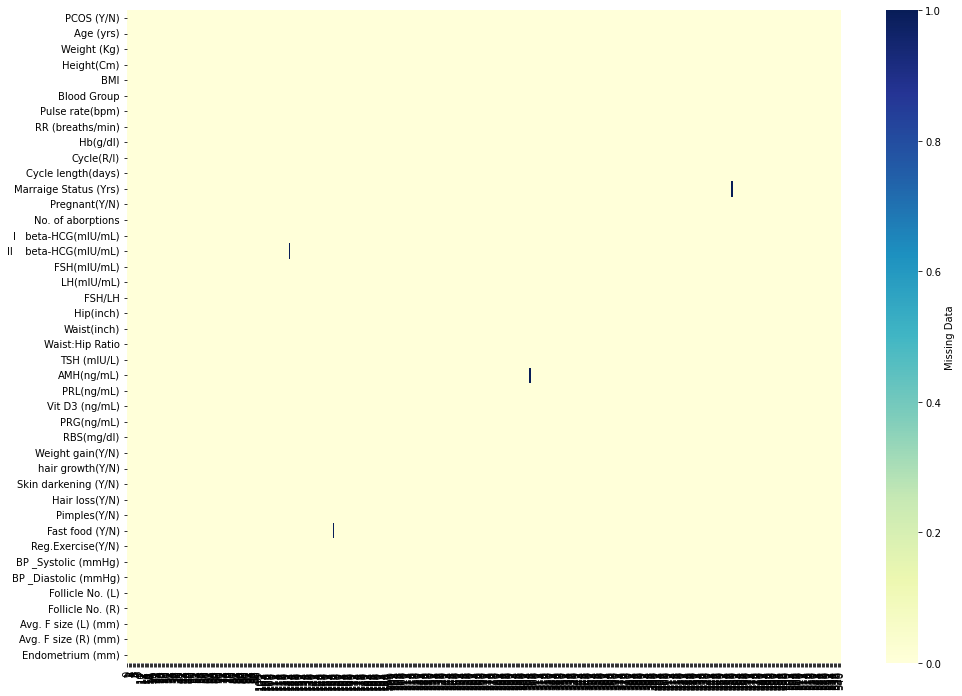

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}, xticklabels=True, yticklabels=True)

column names with **missing** data

In [9]:
lst_missing_columns = df.columns[df.isna().any()].tolist()

In [10]:
lst_missing_columns

['Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

filling **missing values** with their **median**

In [11]:
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median()) #filling columns with missing value with their median

**Verifying** if any **missing** values are left

In [12]:
df.columns[df.isna().any()].tolist() #no more missing values left

[]

<p style="color:red; font-size:40px; font-weight:bold">Visualization</p>

**Plotting correlation heatmap**

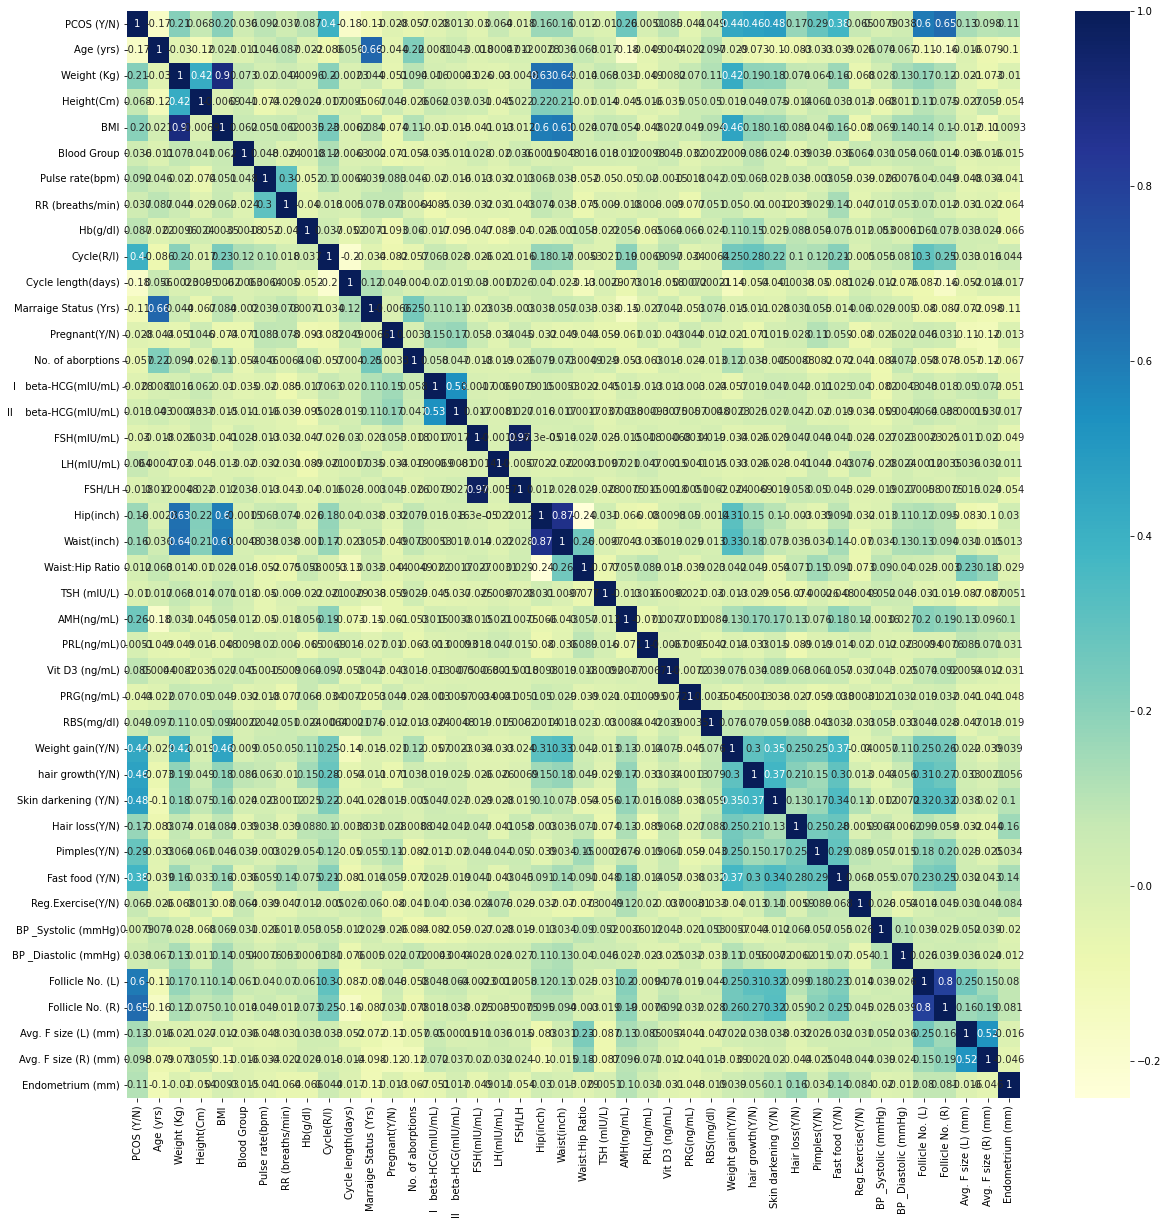

In [13]:
plt.figure(figsize=(20, 20))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

**Checking how different features are correlated to PCOS**

In [14]:
df.corr()["PCOS (Y/N)"].sort_values(ascending=False) #sorting in descending order

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

PCOS is correlated to Follicle Number, Cycle(R/I)

**Identifying numerical and categorical features in dataframe**

In [15]:
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [16]:
categorical_variables

['PCOS (Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

In [17]:
numerical_variables

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Pulse rate(bpm)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

**Plotting Box plot for the numerical variables** 

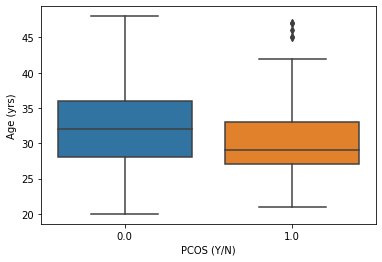

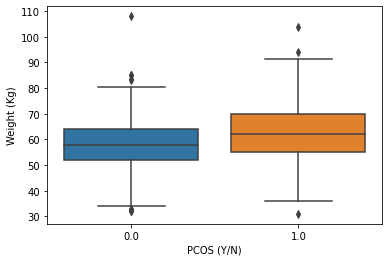

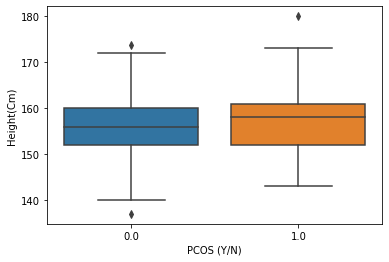

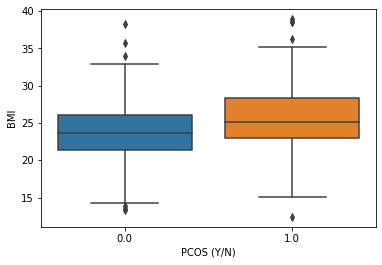

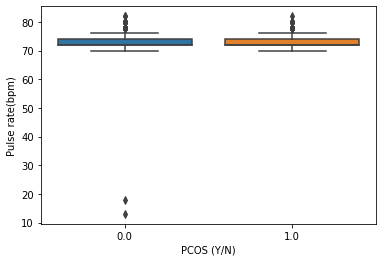

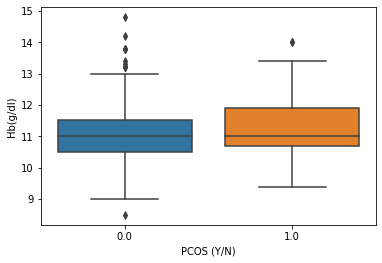

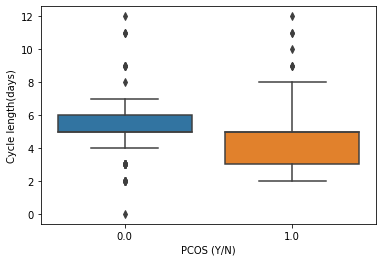

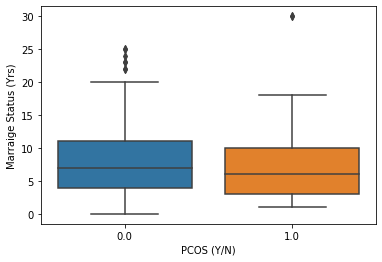

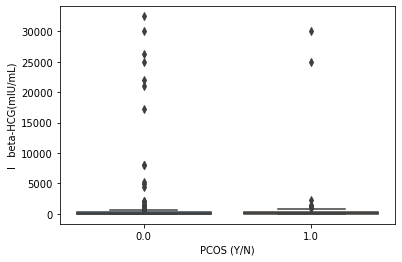

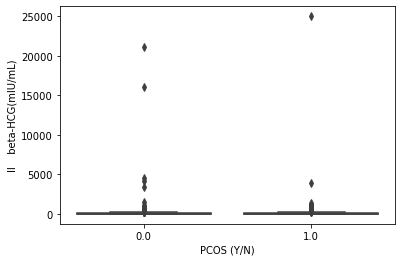

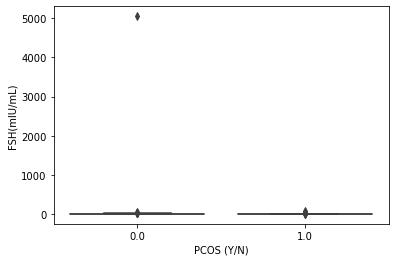

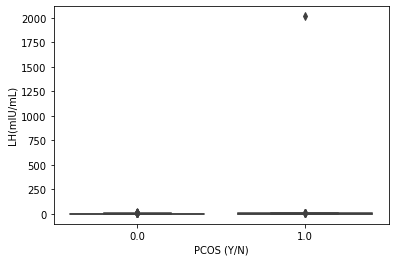

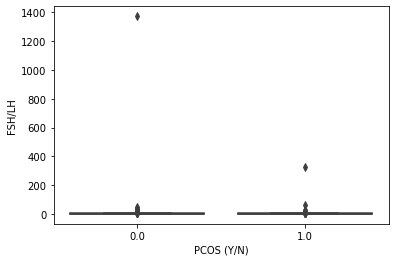

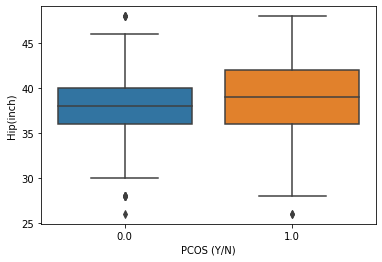

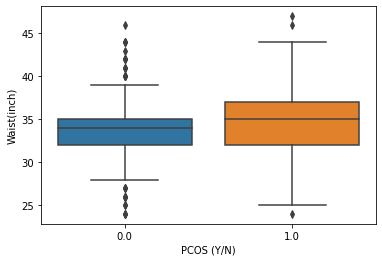

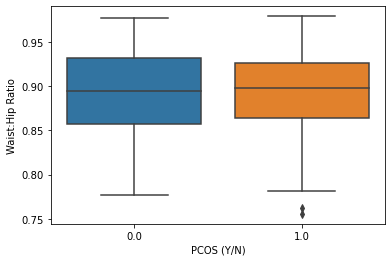

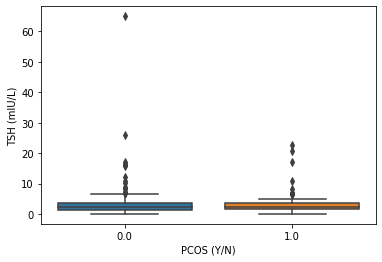

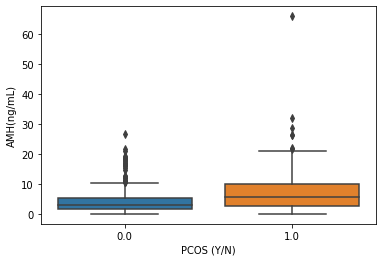

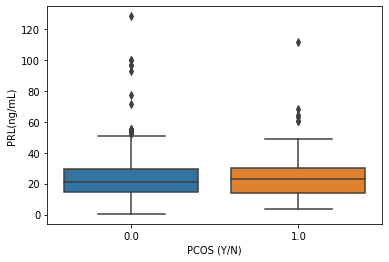

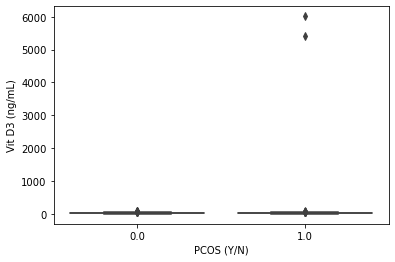

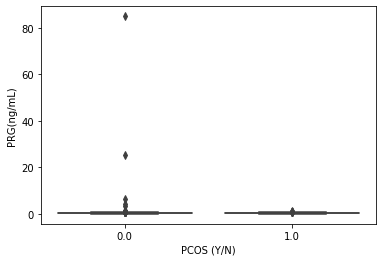

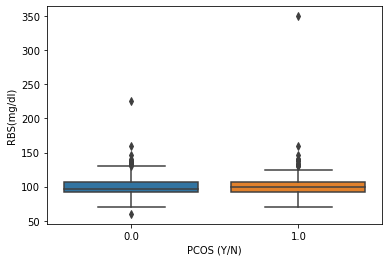

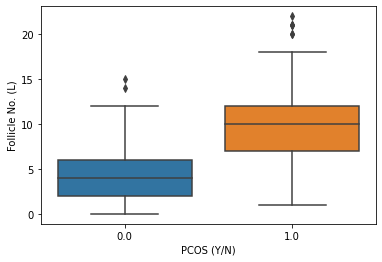

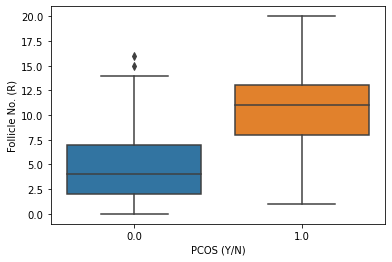

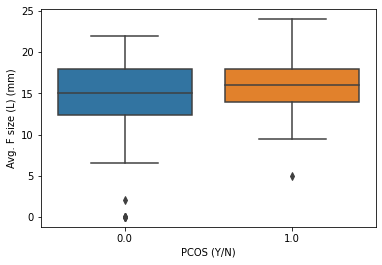

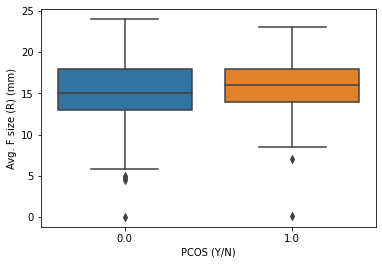

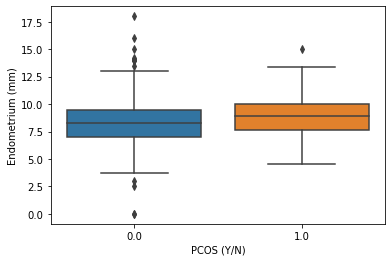

In [18]:
for y in numerical_variables:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=df)
    plt.show()

### Observations from boxplot
* higher the follicle number more the tendancy of PCOS
* patients with lower cycle lengths means more tendancy of PCOS
* the average age of patients diagnosed with PCOS is 30 years

**Plotting barplot for categorical variables**

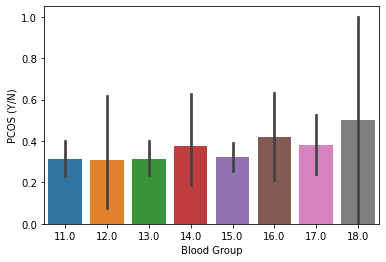

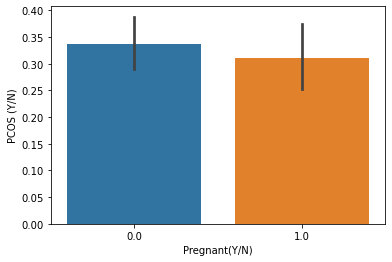

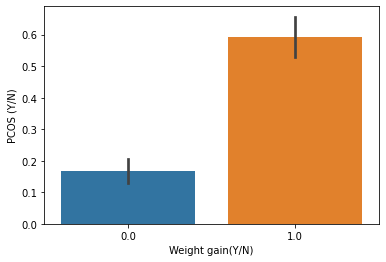

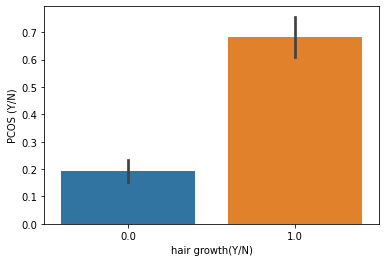

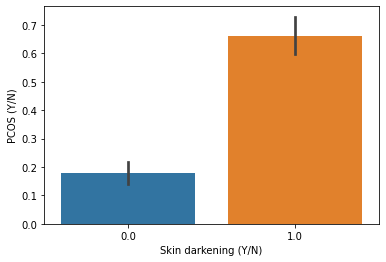

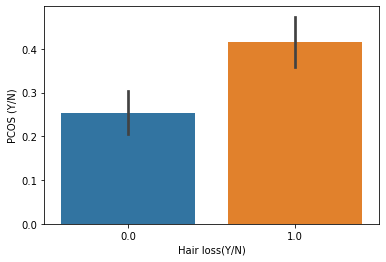

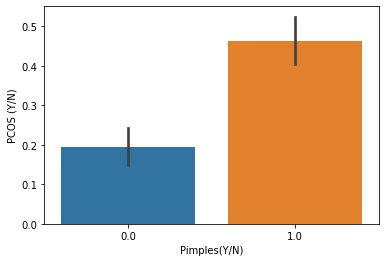

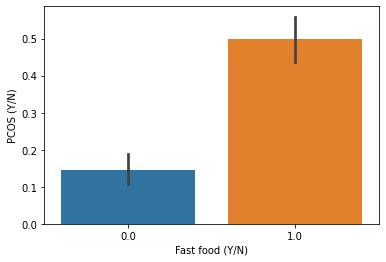

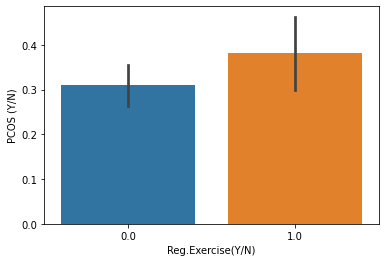

In [19]:
for x in categorical_variables:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS (Y/N)", data = df)
        plt.show()

### Observations from barplot
weight gain, hair growth, pipmles, hair loss, fast food and skin darkening means higher chances of PCOS<br>
**So the above can also be termed as symptoms of PCOS**

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='count'>

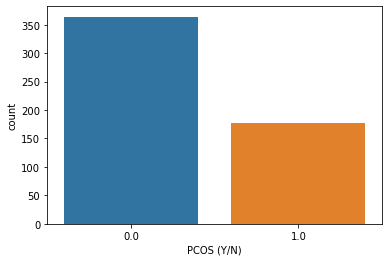

In [20]:
sns.countplot(x = "PCOS (Y/N)", data = df)

In [21]:
df["PCOS (Y/N)"].value_counts()

0.0    364
1.0    177
Name: PCOS (Y/N), dtype: int64

In [282]:
177/(364 + 177)*100

32.71719038817005

**32 %** of patients in our dataset are those having PCOS syndrome

<p style="color:red; font-size:40px; font-weight:bold">Classification using Logistic Regression</p>


In [283]:
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,10.48,2.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,11.70,2.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,11.80,2.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,12.00,2.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,10.00,2.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,11.00,2.0,...,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,10.80,2.0,...,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,10.80,2.0,...,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,12.00,4.0,...,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


In [284]:
y = df.iloc[:, 0]

In [285]:
X = df.iloc[:, 1:]

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Mahesh Saharan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [287]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


**Accuracy of logistic regression classifier on test set: 0.84**

In [288]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[100   9]
 [ 17  37]]


In [289]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       109
         1.0       0.80      0.69      0.74        54

    accuracy                           0.84       163
   macro avg       0.83      0.80      0.81       163
weighted avg       0.84      0.84      0.84       163



**f1-score is 0.84 which is quite close to 1**